# New free to play game ideas

### Scenario
We are looking to develop a brand new free to play game.  We want to know what the current market looks like, and which games are doing the best in the genre.  As we haven't decided on themes, yet we also want to see what sub genres and themes are currently doing well in the free to play space.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import time

from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

First let’s take a look at the top 20 free to play games by positive ratings.  Using the steamspy api we can get a list of all games in the genre.

In [3]:
#call api for free to play genre
response = requests.get('http://steamspy.com/api.php?request=genre&genre=Free+To+Play')
d =response.json()

#create datafram from response
df = pd.DataFrame.from_dict(d, orient='index') 
df = df[['appid','name', 'positive']] #select specific fields we are interested in

#sort by the positive rating and select the top 20
df = df.sort_values('positive',ascending=False).reset_index(drop=True)

df = df.head(20)
df

,appid,name,positive
0,730,Counter-Strike: Global Offensive,5238314
1,570,Dota 2,1327131
2,440,Team Fortress 2,765718
3,304930,Unturned,413537
4,230410,Warframe,410429
5,1085660,Destiny 2,348589
6,1172470,Apex Legends,281718
7,444090,Paladins,267448
8,291550,Brawlhalla,208899
9,236390,War Thunder,200049


<BarContainer object of 20 artists>

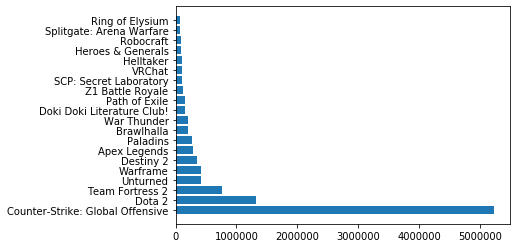

In [4]:
#vis
fig, ax = plt.subplots()
ax.barh(df.name, df.positive)

From the graph and table, we can take a look at the top 20 best rated free to play games.  This will give us an idea of what the competition is and inspiration for our new game in the genre.  From the graph it looks like the top 3 are old and well established free to play games that take the biggest share.

Let’s now look into the themes and sub genres that are most popular in the free to play genre.  To do this we can look at the tags for each game.

## Tags

We can use steamspy to get the tags and votes for each of our top 20 games

In [7]:
# create new empty df
dftags = pd.DataFrame()

for app in df.appid: #run through each game in the top 20 list and return the tags
    response = requests.get('http://steamspy.com/api.php?request=appdetails&appid=' + str(app))
    X = response.json()
    dft = pd.DataFrame.from_dict(X)
    dft.reset_index(level=0, inplace=True)
    dft = dft[['appid','positive','name','tags','index']]
    dft = dft.rename({'tags': 'votes', 'index':'tag'}, axis=1)
    dftags = pd.concat([dftags, dft]) #append the data to our newly created df
    time.sleep(1)

We now have a list of the tags and votes for each top 20 game

In [10]:
dftags = dftags.sort_values(['positive', 'votes'], ascending=[False, False])
dftags.head(30)

,appid,positive,name,votes,tag
4,730,5238314,Counter-Strike: Global Offensive,86928,FPS
13,730,5238314,Counter-Strike: Global Offensive,62349,Shooter
9,730,5238314,Counter-Strike: Global Offensive,59565,Multiplayer
2,730,5238314,Counter-Strike: Global Offensive,51027,Competitive
0,730,5238314,Counter-Strike: Global Offensive,45624,Action
16,730,5238314,Counter-Strike: Global Offensive,44561,Team-Based
19,730,5238314,Counter-Strike: Global Offensive,41407,e-sports
15,730,5238314,Counter-Strike: Global Offensive,39759,Tactical
6,730,5238314,Counter-Strike: Global Offensive,37750,First-Person
11,730,5238314,Counter-Strike: Global Offensive,32929,PvP


Let’s look at the most popular tags over all the games.  Before we do this, we can normalise the votes so that tags from all the games are represented.

In [13]:
#normalise votes per game
dftags['norm_votes'] = dftags['votes'] / dftags.groupby('appid')['votes'].transform('sum')

dftagsT = dftags[['tag', 'norm_votes']]
#sort by most popular tags
dftagsTv = dftagsT.groupby('tag').sum().reset_index().sort_values('norm_votes',ascending=False).reset_index(drop=True)

In [14]:
dftagsTv

,tag,norm_votes
0,Free to Play,2.715324
1,Multiplayer,1.276677
2,Hero Shooter,0.889757
3,Action,0.857068
4,Shooter,0.777081
5,FPS,0.724195
6,First-Person,0.547893
7,Massively Multiplayer,0.492417
8,Co-op,0.472006
9,PvP,0.452955


<BarContainer object of 20 artists>

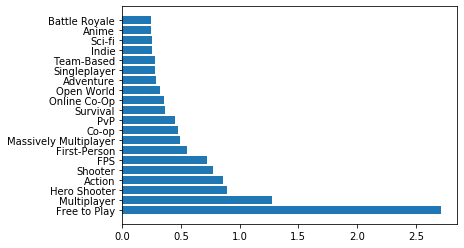

In [18]:
#vis
dftagsTvh = dftagsTv.head(20)
fig, ax = plt.subplots()
ax.barh(dftagsTvh.tag, dftagsTvh.norm_votes)

This list gives us an idea of some of the most popular tags in the free to play genre.  However, looking at the data some of the lower voted tags for the games seem less relevant, so let’s look at the top 3 tags per group as they should be the most relevant to the game.  We can also remove free to play as a tag.

In [19]:
dftagsc = dftags[dftags.tag != 'Free to Play']  # remove free to play tag
dftags3 = dftagsc.groupby('appid').head(3) # only look at top 3 voted tags per group

#normalise data and sort
dftags3['norm_votes'] = dftags3['votes'] / dftags3.groupby('appid')['votes'].transform('sum')
dftags3T = dftags3[['tag', 'norm_votes']]
dftags3Tc = dftags3T.groupby('tag').sum().reset_index().sort_values('norm_votes',ascending=False).reset_index(drop=True)
dftags3Tc.head(20)

C:\Users\Priyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,tag,norm_votes
0,Multiplayer,3.799504
1,FPS,1.670109
2,Hero Shooter,1.515669
3,Shooter,0.930782
4,Survival,0.814434
5,Battle Royale,0.733596
6,World War II,0.689090
7,Anime,0.596463
8,Looter Shooter,0.485479
9,VR,0.407871


We know have a cleaner list of the most popular tags

In [46]:
wordf = dftags3Tc.set_index('tag').to_dict()['norm_votes']

In [49]:
wc = WordCloud(width=800, height=800, max_words=200).generate_from_frequencies(wordf)

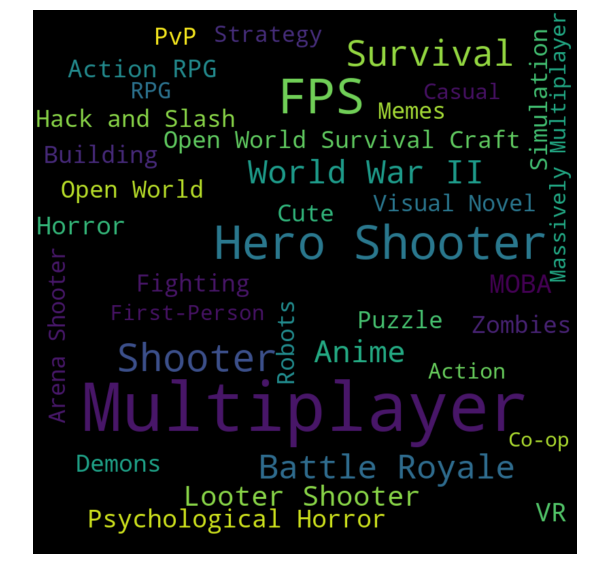

In [50]:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Summary
Looking at the word cloud we can see the most popular game tags and so when we develop our own, we might consider using similar themes and features.  However, there are 2 main issues with this method.

We are assuming that success is measured by popularity however we haven’t considered if these popular games and themes also generate revenue.  For a complete analysis we would want to look at revenue from in app purchases or subscriptions as well.

We are also assuming that creating a new game with similar themes would also be successful when the opposite could be the case.  The themes mentioned above could be overused and so the best solution would be to use a theme not on the list kind of like survivorship bias.

Overall, this analysis has given use a rough idea of what is currently popular and available in the free to play genre in the Steam selection, and what we could use for our own game
